In [ ]:
#PRATIKSHA MEHTA
#60009220172
#D089

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings

##Synthetic Dataset

In [ ]:
features , true_labels = make_blobs(n_samples=200,centers=3,cluster_std=2.75,random_state=42)

In [ ]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=100,random_state=42)
kmeans.fit(scaled_features)

KMeans(init='random', max_iter=100, n_clusters=3, n_init=10, random_state=42)

In [ ]:
#lowest SE_values
kmeans.inertia_

74.57960106819854

#ELBOW METHOD

In [ ]:
#i=no of cluster
#every for loop fit k means ,no of n cluster =i,for every for loop calculate se value
inertia_scores = []
for i in range(1,10):
  km = KMeans(init="random",n_clusters=i,n_init=10,max_iter=100,random_state=42)
  km.fit(scaled_features)
  inertia_scores.append(km.inertia_)
inertia_scores




[400.0,
 173.2307489387777,
 74.57960106819854,
 61.30474344497751,
 52.2753872590211,
 43.963117678328196,
 38.52881875287544,
 34.826374070261245,
 31.138657464397568]

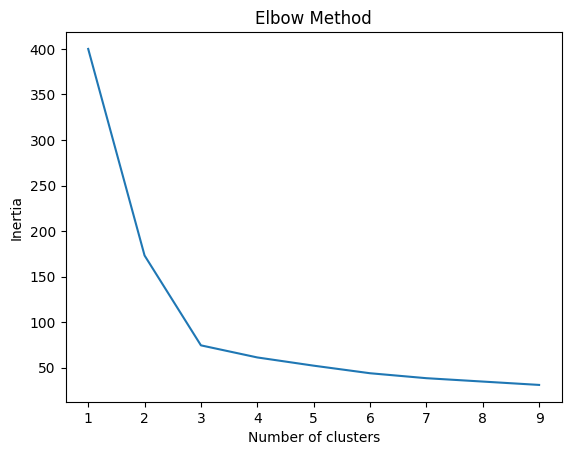

In [ ]:
plt.plot(range(1,10),inertia_scores)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

##SILHOUETTE METHOD

In [ ]:
silhouette_scores = []
for i in range(2,11):
  model = KMeans(init="random",n_clusters=i,n_init=10,max_iter=100,random_state=42)
  model.fit(scaled_features)
  silhouette_scores.append(silhouette_score(scaled_features,model.labels_))
silhouette_scores

[0.5449728784485278,
 0.5915043942870359,
 0.4916111520533458,
 0.39172760330275125,
 0.36713672897176236,
 0.35326132806361693,
 0.36574407217979027,
 0.3579272766766677,
 0.3607265826184605]

Text(0, 0.5, 'Silhouette Coefiecient')

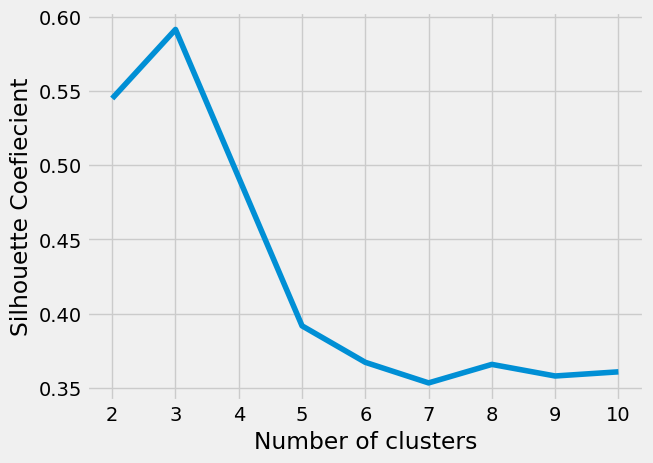

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,len(silhouette_scores)+2),silhouette_scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefiecient")

Conclusion can be our cluster should be three becz at 3 we are getting maximum silhouette coefiencient

In [ ]:
import tarfile
import urllib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [ ]:
uci_tcga_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name = "TCGA-PANCAN-HiSeq-801x20531.tar.gz"
#build the url
full_download_url = urllib.parse.urljoin(uci_tcga_url , archive_name)
#download the file
r  = urllib.request.urlretrieve(full_download_url , archive_name)
#Extract the file from the archive
tar = tarfile.open(archive_name , "r:gz")
tar.extractall()
tar.close()

In [ ]:
datafile = "TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_file = "TCGA-PANCAN-HiSeq-801x20531/labels.csv"
data = np.genfromtxt(datafile,delimiter = "," ,usecols=range(1,20352),skip_header=1)
true_label_names = np.genfromtxt(labels_file,delimiter = "," ,usecols=range(1,),skip_header=1,dtype="str")

In [ ]:
data[:5,:3]

array([[0.        , 2.01720929, 3.26552691],
       [0.        , 0.59273209, 1.58842082],
       [0.        , 3.51175898, 4.32719872],
       [0.        , 3.66361787, 4.50764878],
       [0.        , 2.65574107, 2.82154696]])

In [ ]:
true_label_names[:5]

array(['sample_0', 'sample_1', 'sample_2', 'sample_3', 'sample_4'],
      dtype='<U10')

In [ ]:
label_encoder = LabelEncoder()
true_labels = label_encoder.fit_transform(true_label_names)
true_labels[:5]

array([  0,   1, 112, 223, 334])

In [ ]:
n_clusters=len(label_encoder.classes_)

In [ ]:
preprocessor=Pipeline([("scaler",MinMaxScaler()),("pca",PCA(n_components=2,random_state=42))])

In [ ]:
clusterer=Pipeline([("kmeans",KMeans(n_clusters=n_clusters,init="k-means++",n_init=50,max_iter=500,random_state=42))])

In [ ]:
#pipe is used to join the tow pipeline
pipe=Pipeline([("preprocessor",preprocessor),("clusterer",clusterer)])

In [ ]:
pipe.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=801,
                                         n_init=50, random_state=42))]))])

In [ ]:
preprocessed_data=pipe['preprocessor'].transform(data)

In [ ]:
silhouette_score(preprocessed_data, pipe['clusterer'].labels_)


0.430704613664224

##TITANIC DATASET

In [ ]:
import tarfile
import urllib
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [ ]:
train_uri = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_uri)
test_uri = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_uri)

In [ ]:
print("***** Train_set *****")
print(train.head())
print('\n')
print('***** Test_set *****')
print(test.head())

***** Train_set *****
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
means=train['Age'].mean()
train['Age'].fillna(means,inplace=True)

In [ ]:
train.drop(columns=['Cabin'],inplace=True)

In [ ]:
le = LabelEncoder()
train["Sex"] = le.fit_transform(train["Sex"])
test["Sex"] = le.transform(test["Sex"])

train.head()
#male-1,female-0

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [ ]:
x_train = train[["Sex","Pclass","Age"]]
x_test = test[["Sex","Pclass","Age"]]

In [ ]:
kmeans = KMeans(init="random",n_clusters=2,n_init=10,max_iter=100,random_state=42)
kmeans.fit(x_train)

KMeans(init='random', max_iter=100, n_clusters=2, n_init=10, random_state=42)

In [ ]:
kmeans.inertia_

65747.01299317316

In [ ]:
kmeans.cluster_centers_

array([[ 0.64481707,  2.48628049, 23.83752107],
       [ 0.65531915,  1.81276596, 46.06170213]])

In [ ]:
kmeans.n_iter_

5

In [ ]:
preprocessing_steps = [("scaler", MinMaxScaler()), ("pca", PCA(n_components=2, random_state=42))]

clustering_steps = [("kmeans", KMeans(n_clusters=3, init="k-means++", n_init=50, max_iter=500, random_state=42))]


preprocessing_pipeline = Pipeline(steps=preprocessing_steps)


clustering_pipeline = Pipeline(steps=clustering_steps)

pipeline = Pipeline(steps=[("preprocessor", preprocessing_pipeline), ("clusterer", clustering_pipeline)])



In [ ]:

pipeline.fit(data)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=3, n_init=50,
                                         random_state=42))]))])

In [ ]:
scaler = pipeline.named_steps["preprocessor"].named_steps["scaler"]
pca = pipeline.named_steps["preprocessor"].named_steps["pca"]
kmeans = pipeline.named_steps["clusterer"].named_steps["kmeans"]

In [ ]:
transformed_data = pca.transform(data)
cluster_labels = kmeans.labels_

In [ ]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
sil_score = silhouette_score(transformed_data, cluster_labels)

In [ ]:
rankl_score = adjusted_rand_score(true_labels, cluster_labels)

In [ ]:
print('Silhouette score:', sil_score)
print('Rankl score:', rankl_score)

Silhouette score: 0.5211873947971741
Rankl score: 0.0
